#### **1. IMPORTING REQUIRED LIBRARIES**

In [10]:
import pandas as pd # For data manipulation and analysis.
import matplotlib.pyplot as plt # For creating data visualizations.
import seaborn as sns  # Library for statistical data visualization
import numpy as np # For numerical operations and array manipulation.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For encoding categorical features and scaling numerical data.
from sklearn.compose import make_column_transformer # For applying transformations to specified columns in a DataFrame.
from scipy import stats  # For statistical functions, including Z-score calculations.

#### **2. IMPORTING THE SUPERMARKET DATASET**

In [11]:
# Loading the raw dataset
data = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\submission\\processed_train.csv')
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [13]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### **4. FEATURE DERIVATION**

In [14]:
# unique values of the column 'Outlet_Establishment_Year'
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [15]:
# creating a new column from it
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

In [16]:
# Shape of the data in rows & columns

rows, columns = data.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)

Total number of rows: 8523
Total number of columns: 11


#### **5. CATEGORICAL VARIABLE ENCODING**

In [17]:
# Nominal columns (categorical without order)
nominal_columns = ['Item_Fat_Content', 'Item_Type',
                   'Outlet_Location_Type', 'Outlet_Type'] 

# Ordinal columns (categorical with order)
ordinal_columns = ['Outlet_Size']  

# Continuous (Numerical columns)
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']  

# printing them seperatly
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']


In [18]:
# mapping the ordinal encoding
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [19]:
ohe = OneHotEncoder(drop='first', sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [20]:
ct = make_column_transformer(
    (ohe, ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']),  # Numeric columns
    remainder='passthrough'  # Columns not listed will be passed through without changes
)

ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales', 'Outlet_Age'])])

In [25]:
df_encoded = ct.fit_transform(data)

df_encoded.columns = [col.replace("onehotencoder__", "")
                             .replace("ordinalencoder__", "")
                             .replace("standardscaler__", "") 
                             for col in df_encoded.columns]

print("Encoded Columns:\n", df_encoded.columns.tolist())

Encoded Columns:
 ['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']


In [26]:
# Get the shape of the encoded data
rows, columns = df_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 28


#### **6. OUTLIER TREATMENT**

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


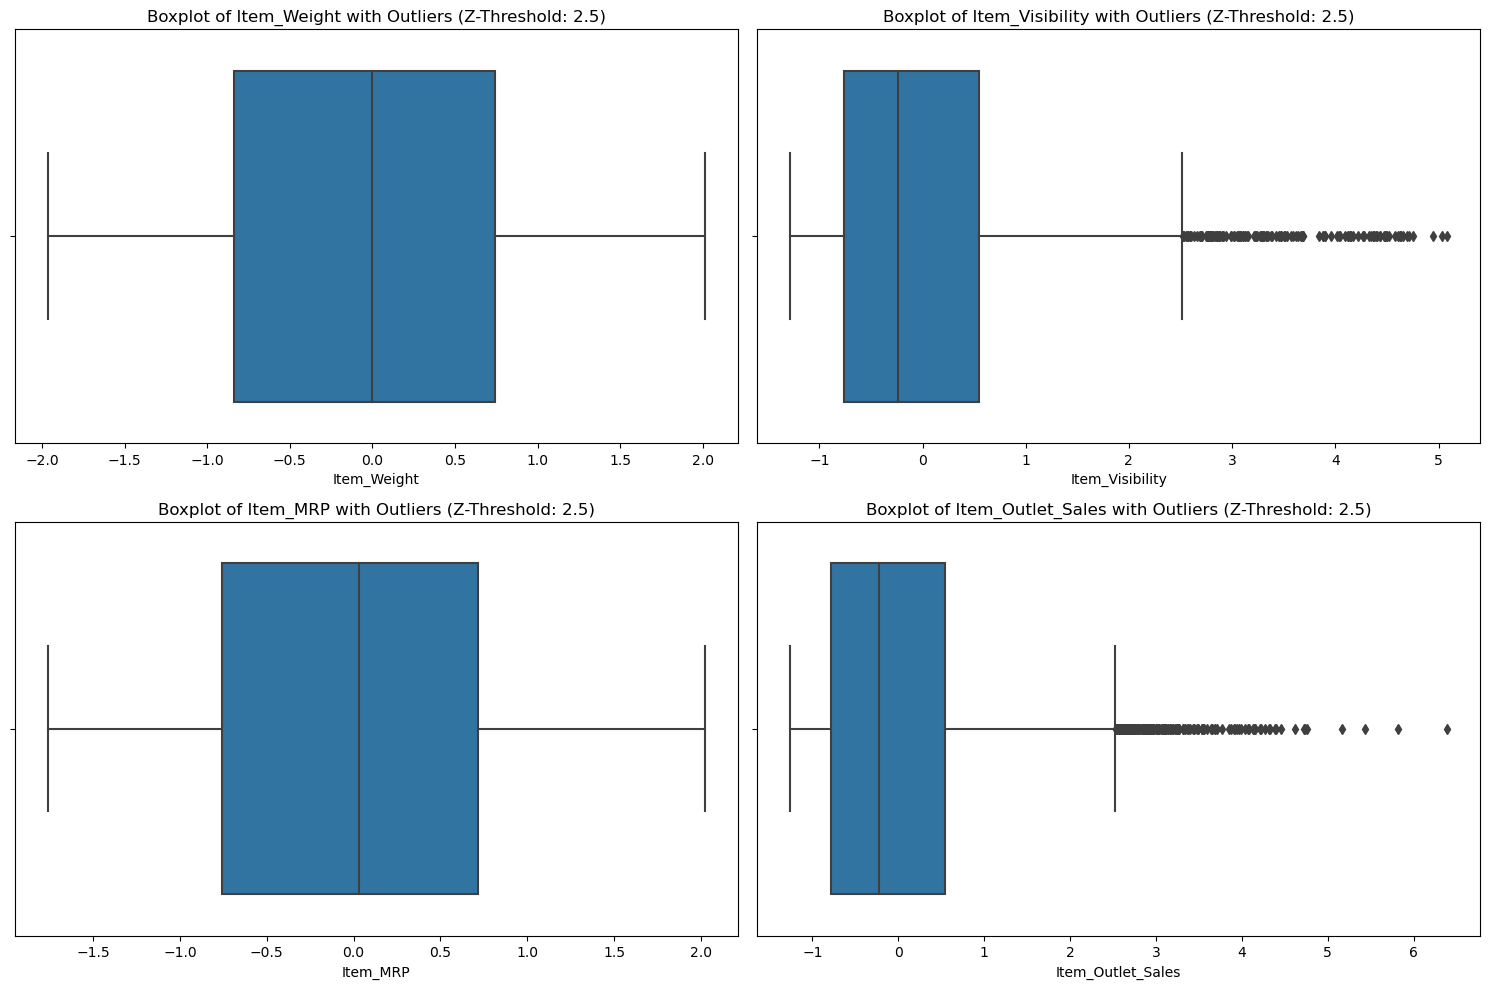

In [27]:
# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5 

# Dictionary to store detected outliers
outliers_dict = {}

# Calculating Z-scores and identifing the outliers
for col in continuous_columns:
    df_encoded[col + '_zscore'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculating Z-score with its formula
    outliers_dict[col] = df_encoded[df_encoded[col + '_zscore'] > z_threshold]  # Storing outliers
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")


plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of plots
    sns.boxplot(x=df_encoded[col])  # Boxplot for the column
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')  
plt.tight_layout()
plt.show()

In [28]:
# Removing rows where Z-score for 'Item_Outlet_Sales' is greater than the threshold
z_threshold = 2.5
outliers_removed = df_encoded[df_encoded['Item_Outlet_Sales_zscore'] <= z_threshold]

print(f"Original dataset size: {df_encoded.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")

Original dataset size: (8523, 32)
Dataset size after removing outliers: (8326, 32)


In [31]:
scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# standardizing the columns
scaler = StandardScaler()
outliers_removed[scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

outliers_removed.head()


C:\Users\Kamlesh P Panchal\AppData\Local\Temp\ipykernel_23504\818785382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed[scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])


,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.836633,-0.971109,1.800763,0.139541,1.122235,-0.139541,0.841822,0.970675,1.747351,0.910548
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.631541,-0.908784,-1.476024,1.334103,-1.074526,-1.334103,1.641610,0.908058,1.488936,1.018381
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.091844,-0.957359,0.041710,0.139541,0.029187,-0.139541,1.098490,0.956861,0.010040,0.049235
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.491650,-1.280664,0.699815,0.020085,-0.881687,-0.020085,1.500750,1.281683,0.660011,0.849053
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,-0.923649,-1.280664,-1.385102,-1.293934,-0.706622,1.293934,0.929373,1.281683,1.399138,0.695332


#### **7. FEATURE SCALING**

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaling to certain numerical features
min_max_scaler = MinMaxScaler()
data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])

# scaled data
data[['Item_MRP', 'Item_Visibility']].head()

,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


### **8. STORING OUR NUMERICAL DATASET**

In [33]:
outliers_removed.to_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\submission\\df_cleaned.csv', index=False)

 Visualizing the distribution of 'Item_Outlet_Sales' and applying log transformation to reduce skewness, followed by re-evaluating the transformed distribution.


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

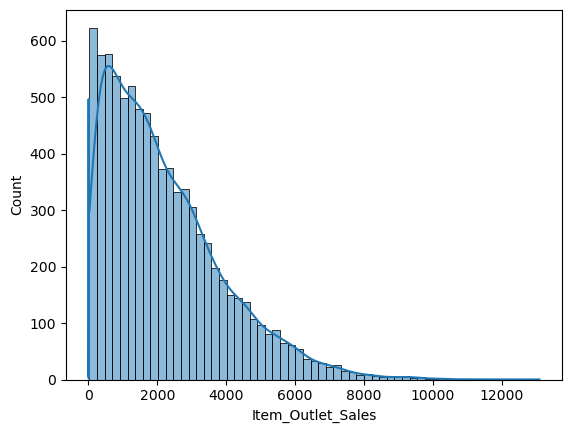

In [34]:
# Investigating the distribution of 'Item_Outlet_Sales'
sns.histplot(data['Item_Outlet_Sales'], kde=True)

# Applying log transformation to address skewness
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

# Checking the distribution after transformation
sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)
